In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.shape

(200, 2)

In [4]:
df.sample(5)

,cgpa,package
142,6.93,3.04
176,6.29,3.23
17,5.38,2.09
60,5.61,2.19
34,7.34,3.42


C:\Users\st057\AppData\Local\Temp\ipykernel_47776\3772540942.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\st057\AppData\Local\Temp\ipykernel_47776\3772540942.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['package'])


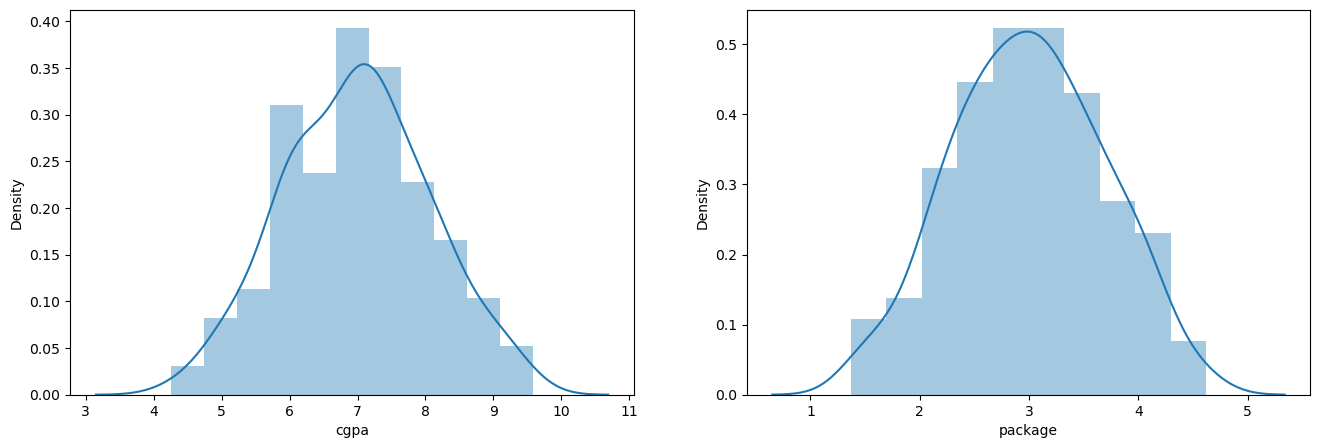

In [9]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['package'])

plt.show()

In [10]:
df['package'].skew()

-0.004815315513143579

In [11]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.990500000000001
Std value of cgpa 1.0694086798895523
Min value of cgpa 4.26
Max value of cgpa 9.58


In [12]:
# Finding the boundary values
print("Highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 10.198726039668658
Lowest allowed 3.7822739603313438


In [13]:
# Finding the outliers
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,package
12,8.94,3.65
40,9.38,4.02
44,5.09,1.86
49,8.87,4.62
50,9.58,4.43
51,9.26,3.79
63,9.16,4.25
77,8.99,4.60
84,4.26,1.53
85,4.79,1.48


# Trimming

In [15]:
# Trimming

new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [16]:
# Approach 2

# Calculating the Zscore

df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [17]:
df.head()

,cgpa,package,cgpa_zscore
0,6.89,3.26,-0.093977
1,5.12,1.98,-1.749097
2,7.82,3.25,0.775662
3,7.42,3.67,0.401624
4,6.94,3.57,-0.047222


In [18]:
df[df['cgpa_zscore'] > 3]

,cgpa,package,cgpa_zscore


In [19]:
df[df['cgpa_zscore'] < -3]

,cgpa,package,cgpa_zscore


In [20]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,package,cgpa_zscore


In [21]:
# Trimming 
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]

In [22]:
new_df

,cgpa,package,cgpa_zscore
0,6.89,3.26,-0.093977
1,5.12,1.98,-1.749097
2,7.82,3.25,0.775662
3,7.42,3.67,0.401624
4,6.94,3.57,-0.047222
...,...,...,...
195,6.93,2.46,-0.056573
196,5.89,2.57,-1.029073
197,7.21,3.24,0.205254
198,7.63,3.96,0.597994


#Capping

In [24]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [25]:
lower_limit

3.7822739603313438

In [26]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [27]:
df.shape

(200, 3)

In [28]:
df['cgpa'].describe()

count    200.000000
mean       6.990500
std        1.069409
min        4.260000
25%        6.190000
50%        6.965000
75%        7.737500
max        9.580000
Name: cgpa, dtype: float64